In [213]:
#Importing Libraries
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [214]:
df = pd.read_csv('/content/PRSA_Data_Gucheng.csv')

df = df.drop(['No','station'],axis = 1)

#Changing the column names
cnames = list(df.columns)

#Drop the first row 
#df = df[24:]

df.dtypes

df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)

df_new = df[['year', 'month', 'day', 'hour']]
df_new['date'] = pd.to_datetime(df_new)

df['date'] = df_new['date']

#Set the date as Index
df = df.set_index(df['date'],drop = False)
df = df.sort_index()

# df_cbwd = df['cbwd']
# df_cbwd['cbwd_mode'] = df_cbwd.resample("d").apply(lambda x: stats.mode(x)[0])

# df = df.resample('d').mean()
# df['cbwd'] = df_cbwd['cbwd_mode']

df['day_of_week'] = df.index.dayofweek

def weekend(row):
    if (row == 5) or (row == 6):
        return 1
    else:
        return 0

df['weekend'] = df['day_of_week'].apply(weekend)


mean = df['PM10'].min()
std_dev = df['PM10'].max() - df['PM10'].min()

for field in cnames:
    print(field, df[field].isna().sum())

df['PM10'] = df['PM10'].fillna(df['PM10'].mean())

df = pd.get_dummies(df, columns = ['wd'] )    

#df['PM10'] = df['PM10']
#df = df.drop(['PM10'], axis = 1)

df = df.drop(['hour', 'date'], axis = 1)

cnames = list(df.columns)

year 0
month 0
day 0
hour 0
PM2.5 646
PM10 381
SO2 507
NO2 668
CO 1401
O3 729
TEMP 51
PRES 50
DEWP 51
RAIN 43
wd 159
WSPM 42


In [215]:
print(cnames)

['year', 'month', 'day', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'day_of_week', 'weekend', 'wd_E', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW']


In [216]:
for field in cnames:
  df[field] = df[field].fillna(df[field].mean())

In [217]:
for field in cnames:
    print(field, df[field].isna().sum())

year 0
month 0
day 0
PM2.5 0
PM10 0
SO2 0
NO2 0
CO 0
O3 0
TEMP 0
PRES 0
DEWP 0
RAIN 0
WSPM 0
day_of_week 0
weekend 0
wd_E 0
wd_ENE 0
wd_ESE 0
wd_N 0
wd_NE 0
wd_NNE 0
wd_NNW 0
wd_NW 0
wd_S 0
wd_SE 0
wd_SSE 0
wd_SSW 0
wd_SW 0
wd_W 0
wd_WNW 0
wd_WSW 0


In [218]:
df.head()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,18.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 01:00:00,2013,3,1,6.0,15.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 02:00:00,2013,3,1,5.0,18.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-03-01 03:00:00,2013,3,1,6.0,20.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-03-01 04:00:00,2013,3,1,5.0,17.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [219]:
df['pm10'] = df['PM10']
df = df.drop('PM10', axis = 1)
df['PM10'] = df['pm10']
df = df.drop('pm10', axis = 1)
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,18.0
2013-03-01 01:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0
2013-03-01 02:00:00,2013,3,1,5.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18.0
2013-03-01 03:00:00,2013,3,1,6.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,20.0
2013-03-01 04:00:00,2013,3,1,5.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,17.0


In [220]:
df = df.resample('d').mean()

In [221]:
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,2013,3,1,8.625000,7.723590,48.934229,888.498934,76.320620,1.691667,1024.816667,-19.691667,0.0,2.350000,4,0,0.166667,0.333333,0.083333,0.000000,0.125000,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.125000,0.000000,16.875000
2013-03-02,2013,3,2,36.916667,37.291667,38.327961,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500,5,1,0.125000,0.208333,0.041667,0.000000,0.041667,0.041667,0.041667,0.041667,0.083333,0.041667,0.166667,0.083333,0.083333,0.000000,0.000000,0.000000,51.375000
2013-03-03,2013,3,3,80.333333,47.541667,62.400551,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000,6,1,0.041667,0.000000,0.041667,0.041667,0.041667,0.000000,0.041667,0.083333,0.000000,0.083333,0.083333,0.041667,0.083333,0.041667,0.375000,0.000000,120.041667
2013-03-04,2013,3,4,26.500000,18.666667,44.268871,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667,0,0,0.083333,0.000000,0.083333,0.083333,0.041667,0.041667,0.000000,0.000000,0.041667,0.041667,0.083333,0.083333,0.041667,0.166667,0.166667,0.041667,51.291667
2013-03-05,2013,3,5,136.708333,72.640257,63.216460,1376.747869,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667,1,0,0.083333,0.041667,0.041667,0.041667,0.125000,0.000000,0.083333,0.041667,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.166667,0.000000,172.541667


In [222]:
df = df.iloc[:-4,:]

In [223]:
for field in cnames:
    df[field] = (df[field] - df[field].min())/(df[field].max() - df[field].min())

In [224]:
train_x = df['PM10'][:-4]
test_x = df['PM10'][-4:]
train_x.head()

date
2013-03-01    0.018881
2013-03-02    0.080672
2013-03-03    0.203657
2013-03-04    0.080522
2013-03-05    0.297687
Freq: D, Name: PM10, dtype: float64

In [225]:
test_x.head()

date
2017-02-21    0.163574
2017-02-22    0.142923
2017-02-23    0.060000
2017-02-24    0.082985
Freq: D, Name: PM10, dtype: float64

In [226]:
train_x.shape

(1453,)

In [227]:
#'''PROPHET GENERAL MODEL'''
from fbprophet import Prophet
pro_train = pd.DataFrame(index = range(0,len(train_x)))
pro_train['ds'] = train_x.index
pro_train['y'] = train_x.values

prop = Prophet(weekly_seasonality = True)
prop.fit(pro_train)
future = prop.make_future_dataframe(periods = 4)
forecast = prop.predict(future)
print(forecast.shape)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(1457, 19)


In [228]:
forecast = forecast.set_index(forecast['ds'])
#forecast = forecast['2015']
#forecast = forecast['2015-10-25':]
forecast_extracted = forecast[-4:]
print(forecast_extracted.shape)

(4, 19)


In [229]:
forecast_extracted.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [230]:
y_test = test_x
y_hat = forecast_extracted['yhat'].values
y_hat_upper = forecast_extracted['yhat_upper'].values
y_hat_lower = forecast_extracted['yhat_lower'].values

In [231]:
y_hat = (y_hat*std_dev)+mean
y_test = (y_test*std_dev)+mean
y_hat_upper = (y_hat_upper*std_dev)+mean
y_hat_lower = (y_hat_lower*std_dev)+mean

In [232]:
print(y_hat)
print(y_test.values)

[218.94654621 220.0895036  224.97956095 234.54538519]
[164.26572099 143.77988776  61.52        84.32119403]


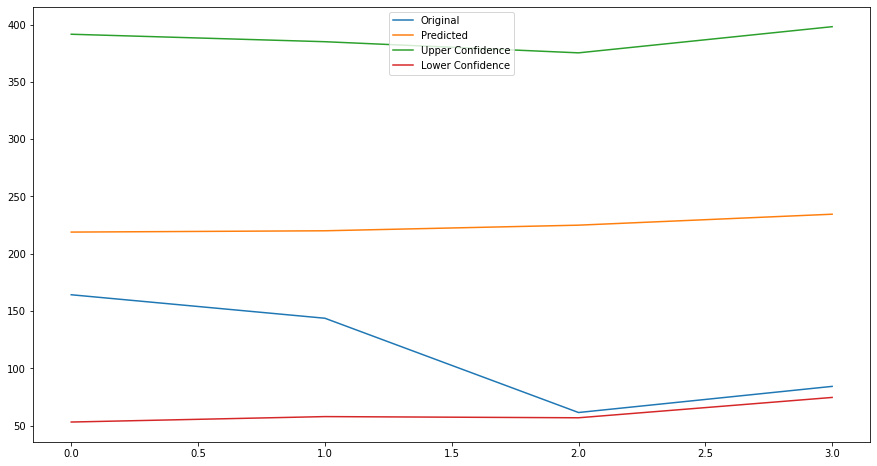

In [233]:
plt.plot(y_test.values, label = 'Original')
plt.plot(y_hat, label = 'Predicted')
plt.plot(y_hat_upper, label = 'Upper Confidence')
plt.plot(y_hat_lower, label = 'Lower Confidence')
plt.legend()
plt.show()

In [234]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test, y_hat))
print(rms_new)

mse_new = mean_squared_error(y_test, y_hat)
print(mse_new)

mae_new = mean_absolute_error(y_test, y_hat)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test, y_hat)
print(mape_new)

120.51917460441733
14524.871447330032
111.16854828980523
132.555135152247
